In [1]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_list = drive.ListFile({'q': "'1H3EtldNffWIY_Enq0ScdrJu2POtonu3L' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: project4.ipynb, id: 103_mKahTcAOaWdXO9ADy7M2x4L8EhpO6
title: project3.ipynb, id: 1sqJH9y3BXn8E6_twhqXz4MFhSEARchEE
title: Stock_Price_MAX.csv, id: 1xLnw6J7wqB0dDqEJrXsCYJ2idfB632Cz
title: network_intrusion_data.csv, id: 12DV-v46vyBKLUNmeHBYadi-bMaoHsr3C
title: drive.ipynb, id: 1DrEk5If3kVLb92Qc-ZiDVwOaUyVvP-ky
title: yelpmini2.ipynb, id: 13xwSQRETP8R35w1dHojQHysYOfyOVF_t
title: reviewgrouped.tsv, id: 1MYJlncWUQD11fvIN27iWTC2r0szm5n8C
title: business.tsv, id: 1U7G03P1f1ps-7h0i5wZD9CLulGVl8tVb


In [0]:
stock_downloaded = drive.CreateFile({'id': '1xLnw6J7wqB0dDqEJrXsCYJ2idfB632Cz'})
stock_downloaded.GetContentFile('Stock_Price_MAX.csv')

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import collections
from sklearn import preprocessing
import sklearn.feature_extraction.text as sk_text
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
import keras
from keras.preprocessing import sequence
from keras.layers import LSTM


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_
  
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=0, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low
 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
      
def class_connection(x):
  if(x=='normal.'):
    x=0
  else:
    x=1
  return x

import numpy as np

def to_sequences(seq_size, df ,data):
    x = []
    y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = df[i:(i+SEQUENCE_SIZE)]
        after_window = data[i+SEQUENCE_SIZE]
        #window = [[x] for x in window]
       #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
  
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
 
  # Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [137]:
df_stock = pd.read_csv('Stock_Price_MAX.csv',encoding="utf-8")
df_stock[0:5]

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [138]:
df_stock.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [0]:
#Dropped 'Date' and 'Adj_Close' Columns
df_stock=df_stock.drop(['Date', 'Adj_Close'], axis=1)

In [0]:
df_stock = df_stock.dropna(how='any',axis=0)

# **Fully Connected Neural Network**

**Feature Normalization**

In [0]:
encode_numeric_range(df_stock, 'Open')
encode_numeric_range(df_stock, 'High')
encode_numeric_range(df_stock, 'Low')
encode_numeric_range(df_stock, 'Volume')

In [0]:
#Preparing x and y
x,y = to_xy(df_stock, 'Close')

In [125]:
#splitting data into 70% training and 30% testing 
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.30, random_state=45)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3074, 4), (1318, 4), (3074,), (1318,))

In [126]:
#Activation: Relu 
#Optimization: Adam
#2 Hidden Layers: 50 and 25 neaurons respectively

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_adam_relu.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)
    
    model_adam_relu = Sequential()
    
    # 50 neurons in 1st hidden layer
    model_adam_relu.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1 

    # 25 neurons in 2nd hidden layer
    model_adam_relu.add(Dense(25, activation='relu')) # Hidden 2
    
    model_adam_relu.add(Dense(1)) # Output

    # optimizer - Back Prop algo
    model_adam_relu.compile(loss='mean_squared_error', optimizer='adam')

    #  monitor
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

    # epochs can be increased 500 or 1000
    model_adam_relu.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model_adam_relu.load_weights('best_weights_adam_relu.hdf5') # load weights from best model

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 10s - loss: 1694.0048 - val_loss: 1582.8311
Epoch 2/1000
 - 1s - loss: 1110.0042 - val_loss: 680.2693
Epoch 3/1000
 - 1s - loss: 358.0865 - val_loss: 195.7937
Epoch 4/1000
 - 1s - loss: 132.6670 - val_loss: 81.2048
Epoch 5/1000
 - 1s - loss: 45.0792 - val_loss: 19.1684
Epoch 6/1000
 - 1s - loss: 8.4368 - val_loss: 2.5065
Epoch 7/1000
 - 1s - loss: 0.9935 - val_loss: 0.3683
Epoch 8/1000
 - 1s - loss: 0.2648 - val_loss: 0.2148
Epoch 9/1000
 - 1s - loss: 0.1955 - val_loss: 0.1773
Epoch 10/1000
 - 1s - loss: 0.1729 - val_loss: 0.1632
Epoch 11/1000
 - 1s - loss: 0.1645 - val_loss: 0.1652
Epoch 12/1000
 - 1s - loss: 0.1614 - val_loss: 0.1589
Epoch 13/1000
 - 1s - loss: 0.1616 - val_loss: 0.1544
Epoch 14/1000
 - 1s - loss: 0.1583 - val_loss: 0.1534
Epoch 15/1000
 - 1s - loss: 0.1585 - val_loss: 0.1538
Epoch 16/1000
 - 1s - loss: 0.1584 - val_loss: 0.1560
Epoch 17/1000
 - 1s - loss: 0.1575 - val_loss: 0.1537
Epoch 00017: early s

Shape: (1318, 1)
Final score (RMSE): 0.39171302318573
R2 score: 0.999832


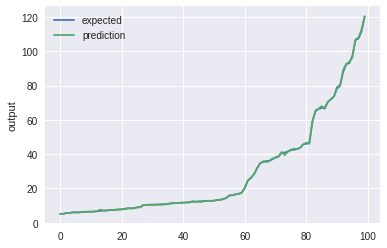

In [127]:
from sklearn.metrics import r2_score
pred = model_adam_relu.predict(x_test)
print("Shape: {}".format(pred.shape))
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test,pred))
# Plot the chart
chart_regression(pred.flatten()[0:100],y_test[0:100])

In [128]:
#Activation: Relu 
#Optimization: Sgd
#2 Hidden Layers: 50 and 25 neaurons respectively

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_sgd_relu.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)
    
    model_sgd_relu = Sequential()
    
    # 50 neurons in 1st hidden layer
    model_sgd_relu.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1 

    # 25 neurons in 2nd hidden layer
    model_sgd_relu.add(Dense(25, activation='relu')) # Hidden 2
    
    model_sgd_relu.add(Dense(1)) # Output

    # optimizer - Back Prop algo
    model_sgd_relu.compile(loss='mean_squared_error', optimizer='sgd')

    #  monitor
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

    # epochs can be increased 500 or 1000
    model_sgd_relu.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model_sgd_relu.load_weights('best_weights_sgd_relu.hdf5') # load weights from best model

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 11s - loss: 946.7653 - val_loss: 1272.5298
Epoch 2/1000
 - 0s - loss: 1168.6967 - val_loss: 953.7115
Epoch 3/1000
 - 0s - loss: 912.7184 - val_loss: 1991.3073
Epoch 4/1000
 - 0s - loss: 942.6968 - val_loss: 3334.4822
Epoch 5/1000
 - 0s - loss: 1026.6831 - val_loss: 928.9404
Epoch 6/1000
 - 0s - loss: 887.2987 - val_loss: 913.8558
Epoch 7/1000
 - 0s - loss: 886.1318 - val_loss: 913.8966
Epoch 8/1000
 - 0s - loss: 885.9965 - val_loss: 913.8273
Epoch 9/1000
 - 1s - loss: 886.0808 - val_loss: 914.2556
Epoch 10/1000
 - 0s - loss: 885.9761 - val_loss: 914.9719
Epoch 11/1000
 - 0s - loss: 885.9212 - val_loss: 915.0540
Epoch 00011: early stopping
1
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 11s - loss: 1362.1436 - val_loss: 991.0478
Epoch 2/1000
 - 0s - loss: 902.9151 - val_loss: 921.3671
Epoch 3/1000
 - 1s - loss: 886.5603 - val_loss: 914.4036
Epoch 4/1000
 - 0s - loss: 885.8920 - val_loss: 915.1525
Epoch 5

Shape: (1318, 1)
Final score (RMSE): 30.22957420349121
R2 score: -0.000054


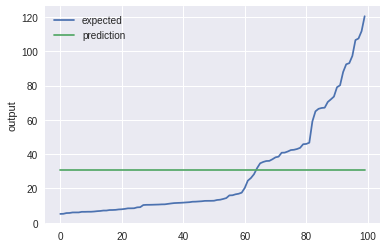

In [129]:
from sklearn.metrics import r2_score
pred = model_sgd_relu.predict(x_test)
print("Shape: {}".format(pred.shape))
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test,pred))
# Plot the chart
chart_regression(pred.flatten()[0:100],y_test[0:100])

In [130]:
#Activation: Relu 
#Optimization: Rmsprop
#2 Hidden Layers: 50 and 25 neaurons respectively

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_rmsprop_relu.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)
    
    model_rmsprop_relu = Sequential()
    
    # 50 neurons in 1st hidden layer
    model_rmsprop_relu.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1 

    # 25 neurons in 2nd hidden layer
    model_rmsprop_relu.add(Dense(25, activation='relu')) # Hidden 2
    
    model_rmsprop_relu.add(Dense(1)) # Output

    # optimizer - Back Prop algo
    model_rmsprop_relu.compile(loss='mean_squared_error', optimizer='rmsprop')

    #  monitor
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

    # epochs can be increased 500 or 1000
    model_rmsprop_relu.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model_rmsprop_relu.load_weights('best_weights_rmsprop_relu.hdf5') # load weights from best model

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 12s - loss: 1681.6201 - val_loss: 1574.9367
Epoch 2/1000
 - 1s - loss: 1227.6707 - val_loss: 943.5152
Epoch 3/1000
 - 1s - loss: 581.2861 - val_loss: 320.7549
Epoch 4/1000
 - 1s - loss: 188.9894 - val_loss: 99.0171
Epoch 5/1000
 - 1s - loss: 48.4685 - val_loss: 11.2557
Epoch 6/1000
 - 1s - loss: 2.2327 - val_loss: 0.6522
Epoch 7/1000
 - 1s - loss: 0.2108 - val_loss: 0.1722
Epoch 8/1000
 - 1s - loss: 0.1994 - val_loss: 0.1579
Epoch 9/1000
 - 1s - loss: 0.1991 - val_loss: 2.0064
Epoch 10/1000
 - 1s - loss: 0.2152 - val_loss: 0.2237
Epoch 11/1000
 - 1s - loss: 0.1987 - val_loss: 0.2041
Epoch 00011: early stopping
1
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 12s - loss: 1632.0009 - val_loss: 1443.2084
Epoch 2/1000
 - 1s - loss: 984.8761 - val_loss: 595.9235
Epoch 3/1000
 - 1s - loss: 309.3771 - val_loss: 153.9244
Epoch 4/1000
 - 1s - loss: 78.1401 - val_loss: 23.4844
Epoch 5/1000
 - 1s - loss: 5.8945 - v

Shape: (1318, 1)
Final score (RMSE): 0.38873788714408875
R2 score: 0.999835


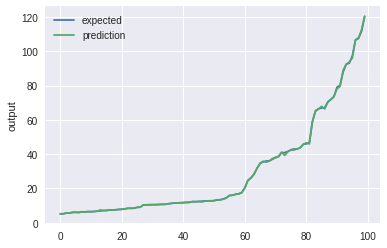

In [131]:
from sklearn.metrics import r2_score
pred = model_rmsprop_relu.predict(x_test)
print("Shape: {}".format(pred.shape))
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test,pred))
# Plot the chart
chart_regression(pred.flatten()[0:100],y_test[0:100])

In [132]:
#Activation: Sigmoid 
#Optimization: Rmsprop
#2 Hidden Layers: 50 and 25 neaurons respectively

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights_rmsprop_sigmoid.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)
    
    model_rmsprop_sigmoid = Sequential()
    
    # 50 neurons in 1st hidden layer
    model_rmsprop_sigmoid.add(Dense(50, input_dim=x_train.shape[1], activation='sigmoid')) # Hidden 1 

    # 25 neurons in 2nd hidden layer
    model_rmsprop_sigmoid.add(Dense(25, activation='sigmoid')) # Hidden 2
    
    model_rmsprop_sigmoid.add(Dense(1)) # Output

    # optimizer - Back Prop algo
    model_rmsprop_sigmoid.compile(loss='mean_squared_error', optimizer='rmsprop')

    #  monitor
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=2, mode='auto')

    # epochs can be increased 500 or 1000
    model_rmsprop_sigmoid.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model_rmsprop_sigmoid.load_weights('best_weights_rmsprop_sigmoid.hdf5') # load weights from best model

0
Train on 3074 samples, validate on 1318 samples
Epoch 1/1000
 - 12s - loss: 1677.5698 - val_loss: 1665.7455
Epoch 2/1000
 - 1s - loss: 1527.9768 - val_loss: 1554.0756
Epoch 3/1000
 - 1s - loss: 1434.9355 - val_loss: 1467.1747
Epoch 4/1000
 - 1s - loss: 1351.6088 - val_loss: 1377.6412
Epoch 5/1000
 - 1s - loss: 1268.9298 - val_loss: 1291.4224
Epoch 6/1000
 - 1s - loss: 1185.9044 - val_loss: 1207.9837
Epoch 7/1000
 - 1s - loss: 1116.5591 - val_loss: 1141.0821
Epoch 8/1000
 - 1s - loss: 1054.3429 - val_loss: 1075.6349
Epoch 9/1000
 - 1s - loss: 999.7392 - val_loss: 1026.5190
Epoch 10/1000
 - 1s - loss: 960.4752 - val_loss: 987.7688
Epoch 11/1000
 - 1s - loss: 929.9143 - val_loss: 957.4669
Epoch 12/1000
 - 1s - loss: 901.0445 - val_loss: 926.1220
Epoch 13/1000
 - 1s - loss: 869.0101 - val_loss: 888.4924
Epoch 14/1000
 - 1s - loss: 826.4338 - val_loss: 838.4174
Epoch 15/1000
 - 1s - loss: 770.4490 - val_loss: 772.3540
Epoch 16/1000
 - 1s - loss: 700.6837 - val_loss: 694.5994
Epoch 17/1000

Shape: (1318, 1)
Final score (RMSE): 0.4845598638057709
R2 score: 0.999743


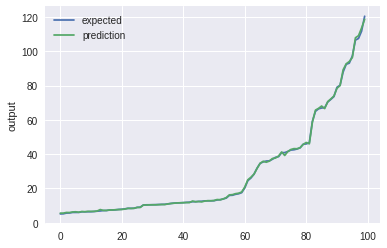

In [133]:
from sklearn.metrics import r2_score
pred = model_rmsprop_sigmoid.predict(x_test)
print("Shape: {}".format(pred.shape))
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test,pred))
# Plot the chart
chart_regression(pred.flatten()[0:100],y_test[0:100])

# LSTM

In [0]:
df_stock_close = df_stock['Close'].tolist()

In [0]:
encode_numeric_range(df_stock, 'Close')

In [147]:
df_stock

,Open,High,Low,Close,Volume
0,0.004378,0.006469,0.006934,0.007408,0.075401
1,0.007031,0.006205,0.008535,0.006482,0.019194
2,0.005970,0.005413,0.008135,0.006350,0.005339
3,0.005970,0.005149,0.007201,0.005027,0.036632
4,0.003714,0.002904,0.003334,0.001191,0.167478
5,0.001725,0.002640,0.003734,0.001588,0.244393
6,0.001990,0.001584,0.000800,0.002117,0.280091
7,0.001459,0.001452,0.003867,0.001984,0.133252
8,0.001725,0.001716,0.004001,0.002778,0.151243
9,0.002521,0.003564,0.005067,0.003043,0.296706


In [149]:
df_stock_close

[4.125,
 4.015625,
 4.0,
 3.84375,
 3.390625,
 3.4375,
 3.5,
 3.484375,
 3.578125,
 3.609375,
 3.640625,
 3.578125,
 3.578125,
 3.613275,
 3.609375,
 3.5625,
 3.515625,
 3.59375,
 3.65625,
 3.5625,
 3.765625,
 3.828125,
 3.703125,
 3.75,
 3.6875,
 3.640625,
 3.5625,
 3.6875,
 3.78125,
 3.8125,
 3.75,
 3.796875,
 3.734375,
 3.921875,
 4.09375,
 4.125,
 4.0,
 3.890625,
 3.828125,
 3.890625,
 3.90625,
 4.109375,
 4.328125,
 4.5,
 4.9375,
 5.078125,
 4.96875,
 4.796875,
 4.53125,
 4.28125,
 4.625,
 4.625,
 4.625,
 4.65625,
 4.59375,
 4.609375,
 4.578125,
 4.5,
 4.53125,
 4.453125,
 4.75,
 4.859375,
 4.96875,
 4.96875,
 4.78125,
 5.109375,
 5.0625,
 4.6289,
 5.140625,
 4.921875,
 5.0625,
 5.125,
 5.3125,
 5.5,
 5.53125,
 5.8125,
 5.734375,
 5.703125,
 5.96875,
 6.046875,
 6.015625,
 6.21875,
 6.1875,
 6.125,
 5.984375,
 5.875,
 5.765625,
 5.453125,
 5.65625,
 5.703125,
 5.78125,
 5.75,
 5.65625,
 5.625,
 5.53125,
 5.421875,
 5.609375,
 5.640625,
 5.703125,
 5.71875,
 5.6875,
 5.625,
 5.7968

In [151]:
#Preparing x and y
SEQUENCE_SIZE = 7
x_lstm,y_lstm = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)
#x_test,y_test = to_sequences(SEQUENCE_SIZE, df_test, close_test)

print("Shape of x: {}".format(x_lstm.shape))
print("Shape of y: {}".format(y_lstm.shape))

Shape of x: (4384, 7, 5)
Shape of y: (4384,)


In [152]:
#Splitting data into 70% training and 30% test set
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm = train_test_split(x_lstm,y_lstm, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train_lstm.shape))
print("Shape of x_test: {}".format(x_test_lstm.shape))
print("Shape of y_train: {}".format(y_train_lstm.shape))
print("Shape of y_test: {}".format(y_test_lstm.shape))

Shape of x_train: (3068, 7, 5)
Shape of x_test: (1316, 7, 5)
Shape of y_train: (3068,)
Shape of y_test: (1316,)


In [154]:
#LSTM neuron: 100
#Optimization: Adam
#No drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5)))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 16s - loss: 705.0630 - val_loss: 26.7265
Epoch 2/10
 - 3s - loss: 44.4260 - val_loss: 5.2775
Epoch 3/10
 - 3s - loss: 36.5188 - val_loss: 4.6421
Epoch 4/10
 - 3s - loss: 28.4287 - val_loss: 3.3172
Epoch 5/10
 - 3s - loss: 30.7830 - val_loss: 13.5041
Epoch 6/10
 - 3s - loss: 27.5501 - val_loss: 2.7978
Epoch 7/10
 - 3s - loss: 21.2009 - val_loss: 4.0737
Epoch 8/10
 - 3s - loss: 21.2365 - val_loss: 2.2322
Epoch 9/10
 - 3s - loss: 18.0366 - val_loss: 3.4324
Epoch 10/10
 - 3s - loss: 20.3565 - val_loss: 11.2104
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 16s - loss: 690.1135 - val_loss: 22.4651
Epoch 2/10
 - 3s - loss: 43.8740 - val_loss: 7.5982
Epoch 3/10
 - 3s - loss: 36.4059 - val_loss: 6.4778
Epoch 4/10
 - 3s - loss: 31.8206 - val_loss: 3.7324
Epoch 5/10
 - 3s - loss: 26.6191 - val_loss: 6.4490
Epoch 6/10
 - 3s - loss: 26.7902 - val_loss: 3.3958
Epoch 7/10


Score (RMSE): 1.4694398874927663
R2 score: 0.997420


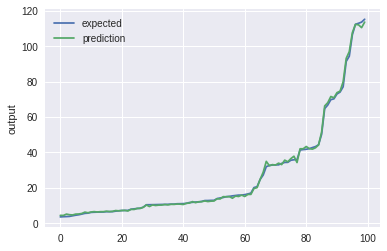

In [155]:
from sklearn import metrics

pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test_lstm,pred))
# Plot the chart
chart_regression(pred.flatten()[0:100],y_test_lstm[0:100])
#pred

In [156]:
#LSTM neuron: 100
#Optimization: Adam
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5)))
    model.add(Dropout(0.1))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 17s - loss: 666.1380 - val_loss: 19.1138
Epoch 2/10
 - 3s - loss: 42.5243 - val_loss: 8.3608
Epoch 3/10
 - 3s - loss: 37.0333 - val_loss: 7.0167
Epoch 4/10
 - 3s - loss: 31.3890 - val_loss: 3.2853
Epoch 5/10
 - 3s - loss: 34.4809 - val_loss: 5.3471
Epoch 6/10
 - 3s - loss: 26.5769 - val_loss: 6.9047
Epoch 7/10
 - 3s - loss: 29.9855 - val_loss: 3.9092
Epoch 8/10
 - 3s - loss: 30.8414 - val_loss: 3.0940
Epoch 9/10
 - 3s - loss: 23.0661 - val_loss: 2.8793
Epoch 10/10
 - 3s - loss: 24.4658 - val_loss: 4.1103
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 17s - loss: 653.3748 - val_loss: 19.6331
Epoch 2/10
 - 3s - loss: 50.3470 - val_loss: 6.1013
Epoch 3/10
 - 3s - loss: 35.2963 - val_loss: 9.9299
Epoch 4/10
 - 3s - loss: 36.2070 - val_loss: 5.1041
Epoch 5/10
 - 3s - loss: 29.3538 - val_loss: 4.0927
Epoch 6/10
 - 3s - loss: 26.4026 - val_loss: 2.6148
Epoch 7/10
 -

Score (RMSE): 1.4566496969584297
R2 score: 0.997464


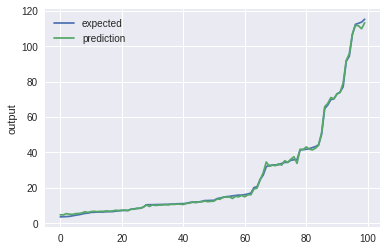

In [157]:
from sklearn import metrics

pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test_lstm,pred))
chart_regression(pred.flatten()[0:100],y_test_lstm[0:100])

In [159]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5)))
    model.add(Dropout(0.1))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 19s - loss: 671.2758 - val_loss: 20.0880
Epoch 2/10
 - 3s - loss: 43.5682 - val_loss: 14.1855
Epoch 3/10
 - 3s - loss: 40.0910 - val_loss: 16.5728
Epoch 4/10
 - 3s - loss: 31.4805 - val_loss: 3.6451
Epoch 5/10
 - 3s - loss: 30.9983 - val_loss: 4.1103
Epoch 6/10
 - 3s - loss: 29.4017 - val_loss: 4.4719
Epoch 7/10
 - 3s - loss: 25.9204 - val_loss: 2.6148
Epoch 8/10
 - 3s - loss: 27.3650 - val_loss: 2.3906
Epoch 9/10
 - 3s - loss: 21.8748 - val_loss: 5.0573
Epoch 10/10
 - 3s - loss: 24.5867 - val_loss: 4.3773
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 19s - loss: 681.7513 - val_loss: 20.8924
Epoch 2/10
 - 3s - loss: 46.4164 - val_loss: 6.5073
Epoch 3/10
 - 3s - loss: 41.5181 - val_loss: 7.6133
Epoch 4/10
 - 3s - loss: 34.9882 - val_loss: 7.7891
Epoch 5/10
 - 3s - loss: 33.3708 - val_loss: 6.6067
Epoch 6/10
 - 3s - loss: 30.7096 - val_loss: 4.1623
Epoch 7/10


Score (RMSE): 1.4540119283986823
R2 score: 0.997474


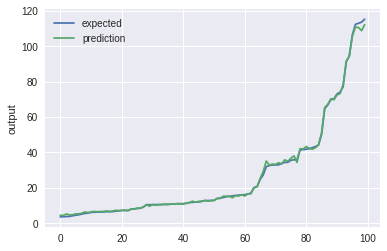

In [160]:
from sklearn import metrics

pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test_lstm,pred))
chart_regression(pred.flatten()[0:100],y_test_lstm[0:100])

In [161]:
#LSTM neuron: 100
#Optimization: Rmsprop
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5)))
    model.add(Dropout(0.1))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 20s - loss: 329.1142 - val_loss: 49.3443
Epoch 2/10
 - 3s - loss: 45.7677 - val_loss: 19.7623
Epoch 3/10
 - 3s - loss: 45.2726 - val_loss: 6.8269
Epoch 4/10
 - 3s - loss: 39.4141 - val_loss: 9.1566
Epoch 5/10
 - 3s - loss: 37.3839 - val_loss: 3.9075
Epoch 6/10
 - 3s - loss: 35.5207 - val_loss: 6.3481
Epoch 7/10
 - 3s - loss: 31.7152 - val_loss: 14.9116
Epoch 8/10
 - 3s - loss: 33.8676 - val_loss: 24.6326
Epoch 9/10
 - 3s - loss: 28.9862 - val_loss: 16.5104
Epoch 10/10
 - 3s - loss: 30.0125 - val_loss: 3.3349
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 21s - loss: 363.0077 - val_loss: 10.9517
Epoch 2/10
 - 3s - loss: 46.4127 - val_loss: 12.0889
Epoch 3/10
 - 3s - loss: 44.7960 - val_loss: 6.8198
Epoch 4/10
 - 3s - loss: 35.9267 - val_loss: 14.8493
Epoch 5/10
 - 3s - loss: 36.2706 - val_loss: 4.4735
Epoch 6/10
 - 3s - loss: 36.3514 - val_loss: 4.6246
Epoch 7

Score (RMSE): 1.575040777881564
R2 score: 0.997035


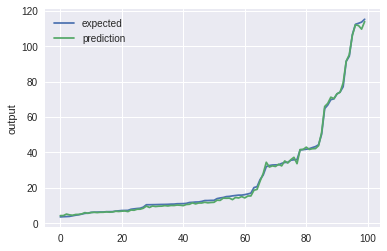

In [162]:
from sklearn import metrics

pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test_lstm,pred))
chart_regression(pred.flatten()[0:100],y_test_lstm[0:100])

In [163]:
#LSTM neuron: 500
#Optimization: Rmsprop
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(500, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5)))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 22s - loss: 177.4113 - val_loss: 104.8412
Epoch 2/10
 - 3s - loss: 83.4671 - val_loss: 76.0531
Epoch 3/10
 - 3s - loss: 74.0278 - val_loss: 24.0489
Epoch 4/10
 - 3s - loss: 66.3659 - val_loss: 6.4427
Epoch 5/10
 - 3s - loss: 55.5911 - val_loss: 24.8771
Epoch 6/10
 - 3s - loss: 52.0905 - val_loss: 96.2145
Epoch 7/10
 - 3s - loss: 52.4562 - val_loss: 76.7451
Epoch 8/10
 - 3s - loss: 46.1449 - val_loss: 3.9174
Epoch 9/10
 - 3s - loss: 46.8482 - val_loss: 31.1145
Epoch 10/10
 - 3s - loss: 38.7047 - val_loss: 20.9562
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 22s - loss: 217.4959 - val_loss: 14.0402
Epoch 2/10
 - 3s - loss: 93.3989 - val_loss: 17.6098
Epoch 3/10
 - 3s - loss: 79.3506 - val_loss: 17.5632
Epoch 4/10
 - 3s - loss: 65.2114 - val_loss: 12.1485
Epoch 5/10
 - 3s - loss: 57.9800 - val_loss: 24.4643
Epoch 6/10
 - 3s - loss: 53.1063 - val_loss: 9.0408
E

Score (RMSE): 1.9090668666548714
R2 score: 0.995645


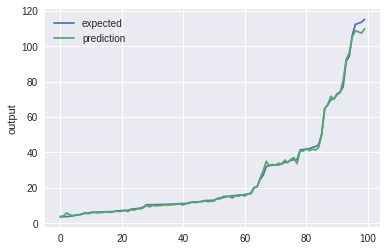

In [164]:
from sklearn import metrics

pred = model.predict(x_test_lstm)
score = np.sqrt(metrics.mean_squared_error(pred,y_test_lstm))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test_lstm,pred))
chart_regression(pred.flatten()[0:100],y_test_lstm[0:100])

# CNN

In [0]:
def to_sequences1(seq_size, df ,data):
    x = []
    y = []

    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = df[i:(i+SEQUENCE_SIZE)]
        after_window = data[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
       #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [166]:
#SEQUENCE_SIZE = 7
#x_train1,y_train1 = to_sequences1(SEQUENCE_SIZE, df_train,close_train)
#x_test1,y_test1 = to_sequences1(SEQUENCE_SIZE, df_test, close_test)
#print("Shape of x_train: {}".format(x_train1.shape))
#print("Shape of x_test: {}".format(x_test1.shape))
#print("Shape of y_train: {}".format(y_train1.shape))
#print("Shape of y_test: {}".format(y_test1.shape))

#Preparing x and y
SEQUENCE_SIZE = 7
x_cnn,y_cnn = to_sequences1(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x_cnn.shape))
print("Shape of y: {}".format(y_cnn.shape))

Shape of x: (4384, 7, 1, 5)
Shape of y: (4384,)


In [167]:
#Splitting data into 70% training and 30% test set
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_cnn,y_cnn, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train1.shape))
print("Shape of x_test: {}".format(x_test1.shape))
print("Shape of y_train: {}".format(y_train1.shape))
print("Shape of y_test: {}".format(y_test1.shape))

Shape of x_train: (3068, 7, 1, 5)
Shape of x_test: (1316, 7, 1, 5)
Shape of y_train: (3068,)
Shape of y_test: (1316,)


In [168]:
from keras.optimizers import Adam
# Define batch_size and # of epochs
batch_size = 128
#kernel size = 2,1 
#kernel number = 32,64
#activation='relu'
#optimizer='adam'
import time
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_extra.hdf5", verbose=0, save_best_only=True) # save best model

model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(2, 1), strides=(1, 1),activation='relu', padding='valid',input_shape=(7,1,5)))
model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_cnn.add(Conv2D(64, (2, 1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(1, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dense(1))
    
model_cnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

start_time = time.time()

model_cnn.fit(x_train1,y_train1,
              batch_size=batch_size,
              epochs=10,
              verbose=2,
              callbacks=[monitor,checkpointer],
              validation_data=(x_test1,y_test1))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model_cnn.load_weights('best_weights_cnn_extra.hdf5') # load weights from best model

Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 21s - loss: 1377.1428 - acc: 3.2595e-04 - val_loss: 227.8571 - val_acc: 0.0000e+00
Epoch 2/10
 - 0s - loss: 88.8901 - acc: 0.0000e+00 - val_loss: 42.7824 - val_acc: 7.5988e-04
Epoch 3/10
 - 0s - loss: 15.5586 - acc: 9.7784e-04 - val_loss: 3.9238 - val_acc: 0.0038
Epoch 4/10
 - 0s - loss: 3.3440 - acc: 0.0026 - val_loss: 2.1533 - val_acc: 0.0038
Epoch 5/10
 - 0s - loss: 2.3114 - acc: 0.0055 - val_loss: 2.0277 - val_acc: 0.0076
Epoch 6/10
 - 0s - loss: 2.2228 - acc: 0.0062 - val_loss: 1.9567 - val_acc: 0.0068
Epoch 7/10
 - 0s - loss: 2.1682 - acc: 0.0068 - val_loss: 1.9795 - val_acc: 0.0068
Epoch 8/10
 - 0s - loss: 2.1496 - acc: 0.0062 - val_loss: 1.8960 - val_acc: 0.0061
Epoch 9/10
 - 0s - loss: 2.1616 - acc: 0.0065 - val_loss: 1.9421 - val_acc: 0.0061
Epoch 10/10
 - 0s - loss: 2.1057 - acc: 0.0062 - val_loss: 1.9285 - val_acc: 0.0068
Epoch 00010: early stopping
Elapsed time: 0:00:40.30


Score (RMSE): 1.3769351138731478
R2 score: 0.997734


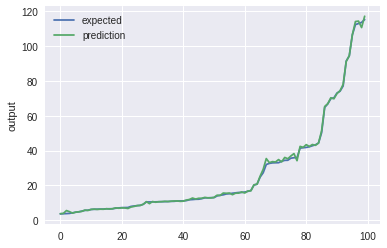

In [169]:
pred = model_cnn.predict(x_test1)
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test1,pred))
chart_regression(pred.flatten()[0:100],y_test1[0:100])

In [170]:
#from keras.optimizers import Adam
# Define batch_size and # of epochs
batch_size = 128
#kernel size = 3,1 
#kernel number = 64,128
#activation='sigmoid'
#optimizer='rmsprop'
import time
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_extra.hdf5", verbose=0, save_best_only=True) # save best model

model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(3, 1), strides=(1, 1),activation='sigmoid', padding='valid',input_shape=(7,1,5)))
model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_cnn.add(Conv2D(128, (3, 1), activation='sigmoid'))
model_cnn.add(MaxPooling2D(pool_size=(1, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='sigmoid'))
model_cnn.add(Dense(1))
    
#model_cnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model_cnn.compile(loss='mean_squared_error', optimizer='rmsprop')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

start_time = time.time()

#model_cnn.fit(x_train1,y_train1,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model_cnn.fit(x_train1,y_train1,batch_size=batch_size,epochs=10,verbose=2,callbacks=[monitor,checkpointer],validation_data=(x_test1,y_test1))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model_cnn.load_weights('best_weights_cnn_extra.hdf5') # load weights from best model

Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 20s - loss: 1062.8152 - val_loss: 834.5998
Epoch 2/10
 - 0s - loss: 913.4790 - val_loss: 835.7159
Epoch 3/10
 - 0s - loss: 905.3406 - val_loss: 824.3475
Epoch 4/10
 - 0s - loss: 877.4887 - val_loss: 762.4737
Epoch 5/10
 - 0s - loss: 774.0925 - val_loss: 631.5358
Epoch 6/10
 - 0s - loss: 479.5150 - val_loss: 251.1356
Epoch 7/10
 - 0s - loss: 223.1585 - val_loss: 130.0318
Epoch 8/10
 - 0s - loss: 129.1568 - val_loss: 90.1243
Epoch 9/10
 - 0s - loss: 93.8533 - val_loss: 57.8347
Epoch 10/10
 - 0s - loss: 69.2839 - val_loss: 62.2971
Elapsed time: 0:00:36.89


Score (RMSE): 7.6049109746464545
R2 score: 0.930886


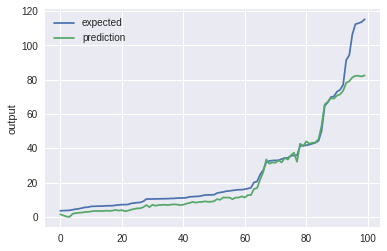

In [171]:
pred = model_cnn.predict(x_test1)
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test1,pred))
chart_regression(pred.flatten()[0:100],y_test1[0:100])

In [187]:
#from keras.optimizers import Adam
# Define batch_size and # of epochs
batch_size = 128
#kernel size = 2,1 
#kernel number = 32,64
#activation='tanh'
#optimizer='rmsprop'
import time
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_extra.hdf5", verbose=0, save_best_only=True) # save best model

model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(2, 1), strides=(1, 1),activation='tanh', padding='valid',input_shape=(7,1,5)))
model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_cnn.add(Conv2D(64, (2, 1), activation='tanh'))
model_cnn.add(MaxPooling2D(pool_size=(1, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='tanh'))
model_cnn.add(Dense(1))
    
#model_cnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model_cnn.compile(loss='mean_squared_error', optimizer='rmsprop')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

start_time = time.time()

#model_cnn.fit(x_train1,y_train1,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model_cnn.fit(x_train1,y_train1,batch_size=batch_size,epochs=10,verbose=2,callbacks=[monitor,checkpointer],validation_data=(x_test1,y_test1))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model_cnn.load_weights('best_weights_cnn_extra.hdf5') # load weights from best model

Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 21s - loss: 485.1578 - val_loss: 157.1838
Epoch 2/10
 - 0s - loss: 141.5152 - val_loss: 94.5539
Epoch 3/10
 - 0s - loss: 85.1321 - val_loss: 57.6525
Epoch 4/10
 - 0s - loss: 54.6469 - val_loss: 76.8721
Epoch 5/10
 - 0s - loss: 44.9424 - val_loss: 31.4338
Epoch 6/10
 - 0s - loss: 37.1663 - val_loss: 27.7184
Epoch 7/10
 - 0s - loss: 29.9406 - val_loss: 34.5849
Epoch 8/10
 - 0s - loss: 28.0967 - val_loss: 16.2014
Epoch 9/10
 - 0s - loss: 27.1074 - val_loss: 23.1200
Epoch 10/10
 - 0s - loss: 24.9081 - val_loss: 13.9306
Elapsed time: 0:00:38.35


Score (RMSE): 3.732374864853
R2 score: 0.983353


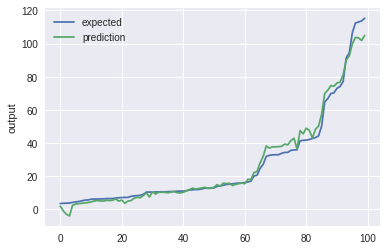

In [188]:
pred = model_cnn.predict(x_test1)
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test1,pred))
chart_regression(pred.flatten()[0:100],y_test1[0:100])

In [179]:
#from keras.optimizers import Adam
# Define batch_size and # of epochs
batch_size = 128
#kernel size = 4,1 and 4,1 
#kernel number = 64,128
#activation='relu'
#optimizer='adam'
#With dropout layer
import time
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_extra.hdf5", verbose=0, save_best_only=True) # save best model

model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(4, 1), strides=(1, 1),activation='relu', padding='valid',input_shape=(7,1,5)))
model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_cnn.add(Conv2D(128, (4, 1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(1, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(500, activation='relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(1))
    
model_cnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

start_time = time.time()

#model_cnn.fit(x_train1,y_train1,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model_cnn.fit(x_train1,y_train1,batch_size=batch_size,epochs=10,verbose=2,callbacks=[monitor,checkpointer],validation_data=(x_test1,y_test1))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model_cnn.load_weights('best_weights_cnn_extra.hdf5') # load weights from best model

Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 20s - loss: 1457.0304 - acc: 0.0000e+00 - val_loss: 262.5143 - val_acc: 0.0023
Epoch 2/10
 - 0s - loss: 92.9402 - acc: 6.5189e-04 - val_loss: 48.5877 - val_acc: 7.5988e-04
Epoch 3/10
 - 0s - loss: 15.0707 - acc: 3.2595e-04 - val_loss: 5.9347 - val_acc: 0.0015
Epoch 4/10
 - 0s - loss: 4.9914 - acc: 0.0023 - val_loss: 2.5844 - val_acc: 0.0038
Epoch 5/10
 - 0s - loss: 3.7909 - acc: 0.0046 - val_loss: 2.1014 - val_acc: 0.0068
Epoch 6/10
 - 0s - loss: 3.6328 - acc: 0.0055 - val_loss: 2.0631 - val_acc: 0.0068
Epoch 7/10
 - 0s - loss: 4.1539 - acc: 0.0055 - val_loss: 2.0614 - val_acc: 0.0068
Epoch 8/10
 - 0s - loss: 3.6224 - acc: 0.0059 - val_loss: 2.1473 - val_acc: 0.0061
Epoch 9/10
 - 0s - loss: 3.6795 - acc: 0.0059 - val_loss: 2.0264 - val_acc: 0.0068
Epoch 10/10
 - 0s - loss: 3.4949 - acc: 0.0039 - val_loss: 2.1037 - val_acc: 0.0068
Elapsed time: 0:00:39.54


Score (RMSE): 1.4235254028085966
R2 score: 0.997578


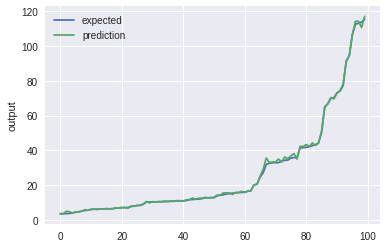

In [180]:
pred = model_cnn.predict(x_test1)
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test1,pred))
chart_regression(pred.flatten()[0:100],y_test1[0:100])

In [189]:
#from keras.optimizers import Adam
# Define batch_size and # of epochs
batch_size = 128
#kernel size = 2,1 and 2,1 
#kernel number = 32,64
#activation='relu'
#optimizer='adam'
#With dropout layer
import time
checkpointer = ModelCheckpoint(filepath="best_weights_cnn_extra.hdf5", verbose=0, save_best_only=True) # save best model

model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(2, 1), strides=(1, 1),activation='relu', padding='valid',input_shape=(7,1,5)))
model_cnn.add(MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))
model_cnn.add(Conv2D(64, (2, 1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(1, 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(1000, activation='relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(Dense(1))
    
model_cnn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

start_time = time.time()

#model_cnn.fit(x_train1,y_train1,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model_cnn.fit(x_train1,y_train1,batch_size=batch_size,epochs=10,verbose=2,callbacks=[monitor,checkpointer],validation_data=(x_test1,y_test1))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))
model_cnn.load_weights('best_weights_cnn_extra.hdf5') # load weights from best model

Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 21s - loss: 1463.9595 - acc: 3.2595e-04 - val_loss: 453.2785 - val_acc: 7.5988e-04
Epoch 2/10
 - 0s - loss: 148.2549 - acc: 3.2595e-04 - val_loss: 51.9307 - val_acc: 0.0015
Epoch 3/10
 - 0s - loss: 24.0604 - acc: 9.7784e-04 - val_loss: 3.6549 - val_acc: 0.0030
Epoch 4/10
 - 0s - loss: 4.0678 - acc: 0.0036 - val_loss: 2.2140 - val_acc: 0.0023
Epoch 5/10
 - 0s - loss: 2.9916 - acc: 0.0042 - val_loss: 2.1441 - val_acc: 0.0068
Epoch 6/10
 - 0s - loss: 2.9087 - acc: 0.0055 - val_loss: 2.0794 - val_acc: 0.0061
Epoch 7/10
 - 0s - loss: 2.8876 - acc: 0.0062 - val_loss: 2.0443 - val_acc: 0.0061
Epoch 8/10
 - 0s - loss: 2.8075 - acc: 0.0065 - val_loss: 2.0253 - val_acc: 0.0068
Epoch 9/10
 - 0s - loss: 2.9106 - acc: 0.0059 - val_loss: 2.0245 - val_acc: 0.0061
Epoch 10/10
 - 0s - loss: 2.7220 - acc: 0.0065 - val_loss: 2.0003 - val_acc: 0.0061
Elapsed time: 0:00:41.20


Score (RMSE): 1.4143216841775033
R2 score: 0.997610


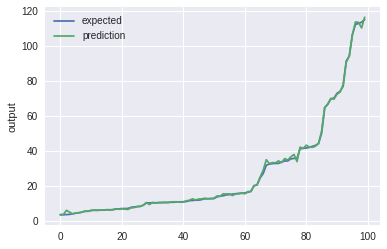

In [190]:
pred = model_cnn.predict(x_test1)
score = np.sqrt(metrics.mean_squared_error(pred,y_test1))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test1,pred))
chart_regression(pred.flatten()[0:100],y_test1[0:100])

# Additional Feature

## N=5

In [191]:
#Preparing x and y
#SEQUENCE_SIZE = 5
#x_train2,y_train2 = to_sequences(SEQUENCE_SIZE, df_train,close_train)
#x_test2,y_test2 = to_sequences(SEQUENCE_SIZE, df_test, close_test)

#print("Shape of x_train: {}".format(x_train2.shape))
#print("Shape of x_test: {}".format(x_test2.shape))
#print("Shape of y_train: {}".format(y_train2.shape))
#print("Shape of y_test: {}".format(y_test2.shape))

SEQUENCE_SIZE = 5
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4386, 5, 5)
Shape of y: (4386,)


In [192]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3070, 5, 5)
Shape of x_test: (1316, 5, 5)
Shape of y_train: (3070,)
Shape of y_test: (1316,)


In [193]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3070 samples, validate on 1316 samples
Epoch 1/10
 - 24s - loss: 759.6758 - val_loss: 28.1175
Epoch 2/10
 - 3s - loss: 47.6036 - val_loss: 7.8443
Epoch 3/10
 - 3s - loss: 37.7969 - val_loss: 5.1396
Epoch 4/10
 - 3s - loss: 36.2474 - val_loss: 4.5735
Epoch 5/10
 - 2s - loss: 34.3303 - val_loss: 4.4076
Epoch 6/10
 - 3s - loss: 33.7884 - val_loss: 3.0189
Epoch 7/10
 - 3s - loss: 29.6046 - val_loss: 3.8216
Epoch 8/10
 - 3s - loss: 28.8296 - val_loss: 4.9079
Epoch 9/10
 - 2s - loss: 27.6187 - val_loss: 11.8021
Epoch 10/10
 - 2s - loss: 26.8121 - val_loss: 10.2769
1
Build model...
Train...
Train on 3070 samples, validate on 1316 samples
Epoch 1/10
 - 24s - loss: 683.2968 - val_loss: 34.0212
Epoch 2/10
 - 3s - loss: 50.1653 - val_loss: 8.4657
Epoch 3/10
 - 2s - loss: 38.2218 - val_loss: 7.7168
Epoch 4/10
 - 3s - loss: 34.3040 - val_loss: 3.9058
Epoch 5/10
 - 3s - loss: 31.8506 - val_loss: 4.7496
Epoch 6/10
 - 3s - loss: 30.8300 - val_loss: 3.5191
Epoch 7/10


Score (RMSE): 1.5717785347136302
R2 score: 0.997192


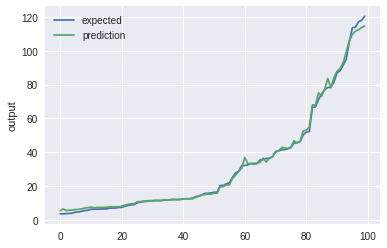

In [194]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=7

In [195]:
#Preparing x and y
SEQUENCE_SIZE = 7
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4384, 7, 5)
Shape of y: (4384,)


In [196]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3068, 7, 5)
Shape of x_test: (1316, 7, 5)
Shape of y_train: (3068,)
Shape of y_test: (1316,)


In [197]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dropout(0.1))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 27s - loss: 665.8806 - val_loss: 18.6535
Epoch 2/10
 - 3s - loss: 44.4200 - val_loss: 8.7990
Epoch 3/10
 - 3s - loss: 41.5544 - val_loss: 4.7249
Epoch 4/10
 - 3s - loss: 34.2680 - val_loss: 5.6079
Epoch 5/10
 - 3s - loss: 31.1929 - val_loss: 7.8200
Epoch 6/10
 - 3s - loss: 26.6742 - val_loss: 2.9350
Epoch 7/10
 - 3s - loss: 24.0746 - val_loss: 4.4635
Epoch 8/10
 - 3s - loss: 24.8426 - val_loss: 4.1146
Epoch 9/10
 - 3s - loss: 24.0240 - val_loss: 2.4722
Epoch 10/10
 - 3s - loss: 23.4606 - val_loss: 2.4750
1
Build model...
Train...
Train on 3068 samples, validate on 1316 samples
Epoch 1/10
 - 26s - loss: 715.3667 - val_loss: 27.9479
Epoch 2/10
 - 3s - loss: 45.6835 - val_loss: 6.3556
Epoch 3/10
 - 3s - loss: 35.8879 - val_loss: 8.4317
Epoch 4/10
 - 3s - loss: 29.4194 - val_loss: 6.9836
Epoch 5/10
 - 3s - loss: 30.2374 - val_loss: 4.4870
Epoch 6/10
 - 3s - loss: 27.0532 - val_loss: 2.5613
Epoch 7/10
 -

Score (RMSE): 1.5723363060252893
R2 score: 0.997046


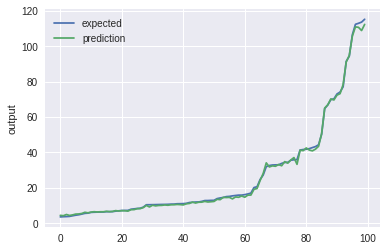

In [198]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=10

In [199]:
#Preparing x and y
SEQUENCE_SIZE = 10
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4381, 10, 5)
Shape of y: (4381,)


In [200]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3066, 10, 5)
Shape of x_test: (1315, 10, 5)
Shape of y_train: (3066,)
Shape of y_test: (1315,)


In [201]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3066 samples, validate on 1315 samples
Epoch 1/10
 - 30s - loss: 614.8646 - val_loss: 24.8152
Epoch 2/10
 - 4s - loss: 43.6855 - val_loss: 8.3534
Epoch 3/10
 - 4s - loss: 41.3368 - val_loss: 7.0120
Epoch 4/10
 - 4s - loss: 37.1574 - val_loss: 15.7941
Epoch 5/10
 - 4s - loss: 32.5925 - val_loss: 8.2689
Epoch 6/10
 - 4s - loss: 32.5330 - val_loss: 4.1642
Epoch 7/10
 - 4s - loss: 25.2086 - val_loss: 5.2398
Epoch 8/10
 - 4s - loss: 26.2883 - val_loss: 2.8362
Epoch 9/10
 - 4s - loss: 29.7507 - val_loss: 2.9494
Epoch 10/10
 - 4s - loss: 23.3943 - val_loss: 2.3772
1
Build model...
Train...
Train on 3066 samples, validate on 1315 samples
Epoch 1/10
 - 30s - loss: 615.8141 - val_loss: 24.6775
Epoch 2/10
 - 4s - loss: 46.9895 - val_loss: 6.7305
Epoch 3/10
 - 4s - loss: 44.6886 - val_loss: 4.4268
Epoch 4/10
 - 4s - loss: 36.3364 - val_loss: 3.2982
Epoch 5/10
 - 4s - loss: 30.1748 - val_loss: 3.4760
Epoch 6/10
 - 4s - loss: 29.2521 - val_loss: 4.3510
Epoch 7/10
 

Score (RMSE): 1.5418099750358443
R2 score: 0.997333


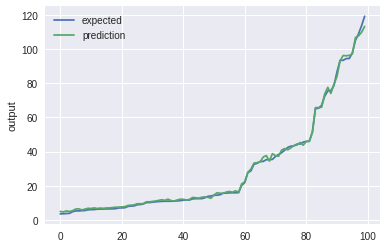

In [202]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=25

In [203]:
#Preparing x and y
SEQUENCE_SIZE = 25
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4366, 25, 5)
Shape of y: (4366,)


In [204]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3056, 25, 5)
Shape of x_test: (1310, 25, 5)
Shape of y_train: (3056,)
Shape of y_test: (1310,)


In [205]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3056 samples, validate on 1310 samples
Epoch 1/10
 - 36s - loss: 1027.0215 - val_loss: 852.2408
Epoch 2/10
 - 9s - loss: 620.7616 - val_loss: 186.3728
Epoch 3/10
 - 9s - loss: 88.3054 - val_loss: 15.5382
Epoch 4/10
 - 9s - loss: 53.4398 - val_loss: 13.0205
Epoch 5/10
 - 9s - loss: 36.2024 - val_loss: 5.9689
Epoch 6/10
 - 9s - loss: 32.3449 - val_loss: 6.4214
Epoch 7/10
 - 9s - loss: 29.0031 - val_loss: 13.2468
Epoch 8/10
 - 9s - loss: 28.5280 - val_loss: 6.4394
Epoch 9/10
 - 9s - loss: 26.3946 - val_loss: 8.1592
Epoch 10/10
 - 9s - loss: 25.1240 - val_loss: 4.6797
1
Build model...
Train...
Train on 3056 samples, validate on 1310 samples
Epoch 1/10
 - 37s - loss: 1043.7209 - val_loss: 872.1547
Epoch 2/10
 - 9s - loss: 775.5166 - val_loss: 451.6274
Epoch 3/10
 - 9s - loss: 199.2167 - val_loss: 34.4150
Epoch 4/10
 - 9s - loss: 60.6116 - val_loss: 16.3897
Epoch 5/10
 - 9s - loss: 51.3167 - val_loss: 19.4574
Epoch 6/10
 - 9s - loss: 40.4228 - val_loss: 7.6

Score (RMSE): 2.16325067936952
R2 score: 0.994782


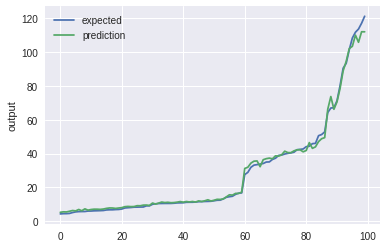

In [206]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=50

In [207]:
#Preparing x and y
SEQUENCE_SIZE = 50
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4341, 50, 5)
Shape of y: (4341,)


In [208]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3038, 50, 5)
Shape of x_test: (1303, 50, 5)
Shape of y_train: (3038,)
Shape of y_test: (1303,)


In [209]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3038 samples, validate on 1303 samples
Epoch 1/10
 - 46s - loss: 1037.6478 - val_loss: 821.5921
Epoch 2/10
 - 16s - loss: 530.7216 - val_loss: 162.7671
Epoch 3/10
 - 17s - loss: 127.1955 - val_loss: 23.9324
Epoch 4/10
 - 16s - loss: 45.1375 - val_loss: 13.6495
Epoch 5/10
 - 17s - loss: 37.3167 - val_loss: 9.5104
Epoch 6/10
 - 17s - loss: 30.6010 - val_loss: 9.2088
Epoch 7/10
 - 16s - loss: 28.9596 - val_loss: 4.8838
Epoch 8/10


KeyboardInterrupt: ignored

Score (RMSE): 0.021226758189045496
R2 score: 0.992013


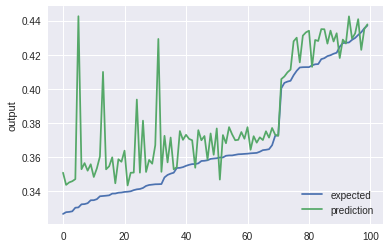

In [102]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=100

In [103]:
#Preparing x and y
SEQUENCE_SIZE = 100
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x_train: (2974, 100, 5)
Shape of x_test: (1215, 100, 5)
Shape of y_train: (2974,)
Shape of y_test: (1215,)


In [0]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

In [104]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 2974 samples, validate on 1215 samples
Epoch 1/10
 - 48s - loss: 0.0015 - val_loss: 0.0011
Epoch 2/10
 - 30s - loss: 6.6368e-04 - val_loss: 0.0038
Epoch 3/10
 - 30s - loss: 5.8653e-04 - val_loss: 0.0027
Epoch 4/10
 - 30s - loss: 6.2370e-04 - val_loss: 0.0071
Epoch 5/10
 - 30s - loss: 4.7358e-04 - val_loss: 0.0035
Epoch 6/10
 - 30s - loss: 3.6285e-04 - val_loss: 0.0099
Epoch 00006: early stopping
1
Build model...
Train...
Train on 2974 samples, validate on 1215 samples
Epoch 1/10
 - 48s - loss: 0.0012 - val_loss: 0.0051
Epoch 2/10
 - 30s - loss: 6.5132e-04 - val_loss: 0.0085
Epoch 3/10
 - 30s - loss: 6.1493e-04 - val_loss: 0.0053
Epoch 4/10
 - 30s - loss: 5.2654e-04 - val_loss: 0.0223
Epoch 5/10
 - 30s - loss: 4.4682e-04 - val_loss: 0.0052
Epoch 6/10
 - 30s - loss: 3.2709e-04 - val_loss: 0.0069
Epoch 00006: early stopping
2
Build model...
Train...
Train on 2974 samples, validate on 1215 samples
Epoch 1/10
 - 49s - loss: 0.0018 - val_loss: 0.0015
Epoch 

Score (RMSE): 0.033609774156719015
R2 score: 0.980374


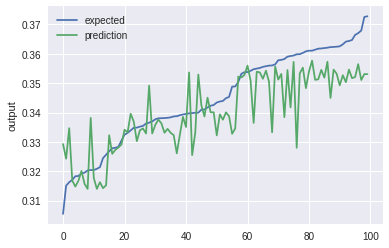

In [105]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])

## N=2

In [210]:
#Preparing x and y
SEQUENCE_SIZE = 2
x2,y2 = to_sequences(SEQUENCE_SIZE, df_stock.values, df_stock_close)

print("Shape of x: {}".format(x2.shape))
print("Shape of y: {}".format(y2.shape))

Shape of x: (4389, 2, 5)
Shape of y: (4389,)


In [211]:
#Splitting data into 70% training and 30% test set
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.3, random_state =42)
print("Shape of x_train: {}".format(x_train2.shape))
print("Shape of x_test: {}".format(x_test2.shape))
print("Shape of y_train: {}".format(y_train2.shape))
print("Shape of y_test: {}".format(y_test2.shape))

Shape of x_train: (3072, 2, 5)
Shape of x_test: (1317, 2, 5)
Shape of y_train: (3072,)
Shape of y_test: (1317,)


In [212]:
#LSTM neuron: 100
#Optimization: SGD
#With drop out layer

#checkpointer
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
    print(i)    
    print('Build model...')
    model = Sequential()
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5)))
    model.add(Dense(50))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 
model.load_weights('best_weights.hdf5')

0
Build model...
Train...
Train on 3072 samples, validate on 1317 samples
Epoch 1/10
 - 31s - loss: 1071.8523 - val_loss: 75.1852
Epoch 2/10
 - 2s - loss: 44.8183 - val_loss: 4.8347
Epoch 3/10
 - 2s - loss: 36.7003 - val_loss: 3.1964
Epoch 4/10
 - 2s - loss: 36.4432 - val_loss: 3.4546
Epoch 5/10
 - 2s - loss: 31.8191 - val_loss: 4.0282
Epoch 6/10
 - 2s - loss: 32.7543 - val_loss: 3.0417
Epoch 7/10
 - 2s - loss: 32.3161 - val_loss: 3.1965
Epoch 8/10
 - 2s - loss: 29.9222 - val_loss: 4.0396
Epoch 9/10
 - 2s - loss: 28.7604 - val_loss: 2.6067
Epoch 10/10
 - 2s - loss: 31.2688 - val_loss: 2.1537
1
Build model...
Train...
Train on 3072 samples, validate on 1317 samples
Epoch 1/10
 - 32s - loss: 1030.3432 - val_loss: 58.9051
Epoch 2/10
 - 2s - loss: 38.7183 - val_loss: 4.2716
Epoch 3/10
 - 2s - loss: 36.5083 - val_loss: 3.6017
Epoch 4/10
 - 2s - loss: 31.8624 - val_loss: 2.9798
Epoch 5/10
 - 2s - loss: 33.3399 - val_loss: 2.9299
Epoch 6/10
 - 2s - loss: 31.6435 - val_loss: 2.5245
Epoch 7/10


Score (RMSE): 1.4675561203808754
R2 score: 0.997543


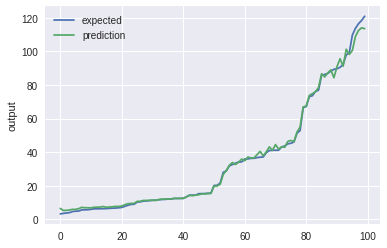

In [213]:
pred = model.predict(x_test2)
score = np.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))
print('R2 score: %2f' % r2_score(y_test2,pred))
chart_regression(pred.flatten()[0:100],y_test2[0:100])